In [3]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 2.8 MB/s eta 0:00:01


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from core.trade_service.instruments.moving_averages import MA

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [98]:
data = pd.read_csv('../../data/BTCUSDT-1h-data.csv')
data.loc[:,'timestamp'] = pd.to_datetime(data.timestamp)
data = data.set_index('timestamp')
data['ma_14'] = MA('close', 14).evaluate(data)
data = data.dropna()

In [35]:
data_sample = data.iloc[-200:]

In [39]:
decomposition = seasonal_decompose(data_sample.ma_14)

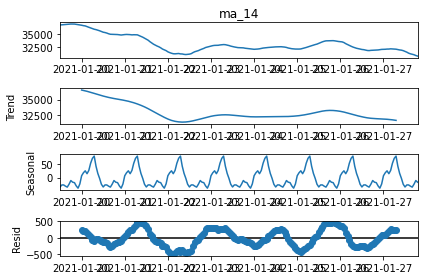

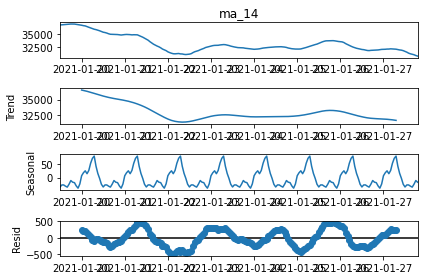

In [40]:
decomposition.plot()

/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


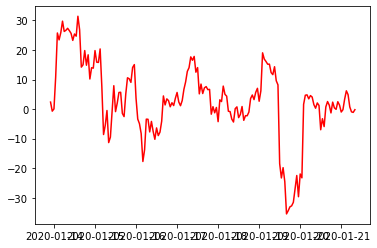

In [99]:
model = ARIMA(data_sample.ma_14, order=(2,1,2))
model_fitted = model.fit(disp=-1)
plt.plot(model_fitted.fittedvalues, color='red')

In [47]:
import numpy as np

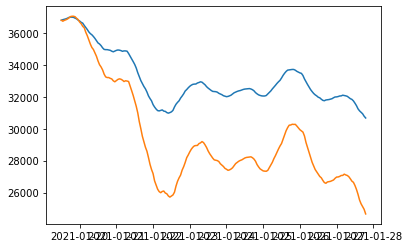

In [54]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(data_sample.ma_14.iloc[0], index=data_sample.index)
predictions_ARIMA = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

plt.plot(data_sample.ma_14)
plt.plot(predictions_ARIMA)

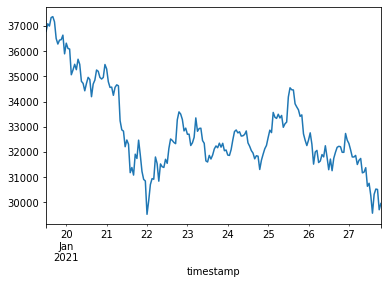

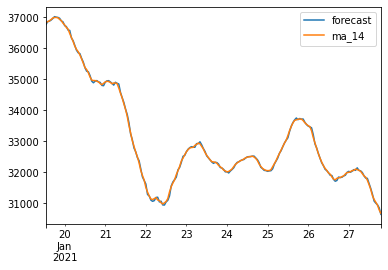

In [65]:
data_sample.close.plot()
results.plot_predict(); plt.show()

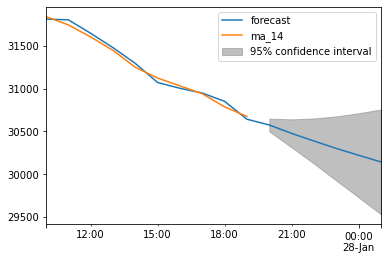

In [66]:
results.plot_predict(len(data_sample)-10, len(data_sample)+5); plt.show()

In [81]:
pred, stderror, ci = model_fitted.forecast(5)

In [161]:
from datetime import datetime
from tqdm import tqdm

In [268]:
data = pd.read_csv('../../data/BTCUSDT-1h-data.csv')
data.loc[:,'timestamp'] = pd.to_datetime(data.timestamp)
data = data.set_index('timestamp')
data['ma_14'] = MA('close', 14).evaluate(data)
#data = data.dropna()

In [269]:
data = data.loc[datetime(2020,1,1):datetime(2021,6,1)]

In [270]:
indice = pd.DataFrame(pd.date_range(data.index.min(), data.index.max(), freq="H")).set_index(0)

In [271]:
data = pd.merge(indice, data, left_index=True, right_index=True, how='left').sort_index()

In [272]:
data = data.fillna(method='ffill')

In [273]:
data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)

In [182]:
window = 180

cis = []
for start in tqdm(range(window, len(data)-window)):
    data_sample = data.iloc[start:start+window]
    try:
        model = ARIMA(data_sample.ma_14, order=(2,1,2))
        model_fitted = model.fit(disp=-1)
        _, _, ci = model_fitted.forecast(5)
        cis.append(ci[-1])
    except ValueError:
        cis.append(np.NaN)
    


  0%|          | 0/9068 [00:00<?, ?it/s]/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
  1%|▏         | 133/9068 [00:22<26:39,  5.59it/s]/Users/guidosidoni/opt/anaconda3/envs

LinAlgError: SVD did not converge

In [212]:
lower = []
for x in cis:
    if type(x) != np.ndarray and np.isnan(x):
        lower.append(x)
    else:
        lower.append(x[0])
    

In [274]:
start_index = data.iloc[window+5].name
end_index = data.iloc[window+len(cis)-1+5].name
data.loc[start_index:end_index, 'lower'] = lower

In [275]:
data = data.dropna()

<AxesSubplot:>

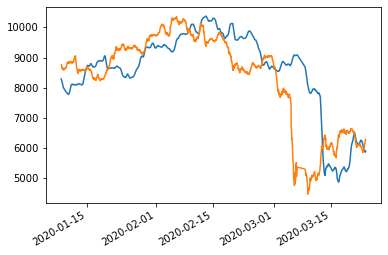

In [276]:
data.ma_14.plot()
data.lower.shift().plot()